In [4]:
### Importing all the required packages and loading csv files
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
from sklearn import preprocessing
import numpy as np
data = pd.read_csv('Dataset.txt')
data_attack = pd.read_csv('Attack_types.txt')


# Create new DataFrame with 'Attack category' column
att_cat = data[['attack_category']].copy()

# View the resulting DataFrame
att_cat.head()



,attack_category
0,normal
1,normal
2,neptune
3,normal
4,normal


In [5]:
### seperating attack types and categories in attacktype.txt
data_attack[['attack_category', 'attack_type']] = data_attack['attack_category attack_type'].str.split(' ', expand=True)
data_attack.drop('attack_category attack_type',axis = 1, inplace=True)
data_attack.head()

,attack_category,attack_type
0,apache2,dos
1,back,dos
2,mailbomb,dos
3,processtable,dos
4,snmpgetattack,dos


In [6]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [7]:
# my_dict = data_attack.set_index('category')['type'].to_dict()
# my_dict
# merging/joining both datafarmes so that mapping could be done
data = data.merge(data_attack, on='attack_category', how='left')


In [6]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,attack_type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,NaN
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,NaN
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,NaN
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,NaN


In [ ]:
# for tye in target['attack_category']:
#         target['attack'] = ''

# target.head()
    


In [8]:
# for tye in target['attack_category']:
#         pass
# counting value= normal in the dataset
data['attack_category'].value_counts()['normal']


67343

In [9]:
# checking null values
nulls =data.isnull().sum()
print(nulls , data.shape)

duration                           0
protocol_type                      0
service                            0
flag                               0
src_bytes                          0
dst_bytes                          0
land                               0
wrong_fragment                     0
urgent                             0
hot                                0
num_failed_logins                  0
logged_in                          0
num_compromised                    0
root_shell                         0
su_attempted                       0
num_root                           0
num_file_creations                 0
num_shells                         0
num_access_files                   0
num_outbound_cmds                  0
is_host_login                      0
is_guest_login                     0
count                              0
srv_count                          0
serror_rate                        0
srv_serror_rate                    0
rerror_rate                        0
s

In [10]:
# replacing all the null values in attack type with normal because no attack occured
data['attack_type'] = data['attack_type'].replace(np.nan,'normal')

In [11]:
data['attack_type'].value_counts()['normal']

67343

In [12]:
# null values removed 
nulls =data.isnull().sum()
print(nulls , data.shape)


duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [12]:
data.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,attack_type
125979,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20,dos
125980,8,udp,private,SF,105,145,0,0,0,0,...,0.01,0.01,0.0,0.00,0.0,0.00,0.0,normal,21,normal
125981,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.06,0.00,0.0,0.72,0.0,0.01,0.0,normal,18,normal
125982,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.05,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20,dos
125983,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,0.03,0.30,0.0,0.00,0.0,0.00,0.0,normal,21,normal


In [13]:
# dropping attack category column because it is no longer needed
data.drop('attack_category' ,axis = 1, inplace=True)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance,attack_type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,normal


In [14]:
for i in data:
    if data[i].dtype == 'object':
        print(f" {i} = {data[i].unique()}")

 protocol_type = ['tcp' 'udp' 'icmp']
 service = ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']
 flag = ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
 attack_type = ['normal' 'dos' 'r2l' 'probe' 'u2r']


In [ ]:
data.shape


(125984, 43)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125984 entries, 0 to 125983
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125984 non-null  int64  
 1   protocol_type                125984 non-null  object 
 2   service                      125984 non-null  object 
 3   flag                         125984 non-null  object 
 4   src_bytes                    125984 non-null  int64  
 5   dst_bytes                    125984 non-null  int64  
 6   land                         125984 non-null  int64  
 7   wrong_fragment               125984 non-null  int64  
 8   urgent                       125984 non-null  int64  
 9   hot                          125984 non-null  int64  
 10  num_failed_logins            125984 non-null  int64  
 11  logged_in                    125984 non-null  int64  
 12  num_compromised              125984 non-null  int64  
 13 

In [ ]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance
count,125984.000000,1.259840e+05,1.259840e+05,125984.000000,125984.000000,125984.000000,125984.000000,125984.000000,125984.000000,125984.000000,...,125984.000000,125984.000000,125984.000000,125984.000000,125984.000000,125984.000000,125984.000000,125984.000000,125984.000000,125984.000000
mean,287.120150,4.556280e+04,1.978262e+04,0.000198,0.022685,0.000111,0.204423,0.001222,0.395709,0.279353,...,115.643391,0.521276,0.082944,0.148424,0.032540,0.284478,0.278511,0.118822,0.120229,19.503707
std,2604.402926,5.870075e+06,4.021094e+06,0.014085,0.253519,0.014365,2.149887,0.045237,0.489004,23.941038,...,110.702693,0.448952,0.188915,0.309041,0.112559,0.444780,0.445665,0.306546,0.319447,2.292028
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


<AxesSubplot:xlabel='duration', ylabel='Count'>

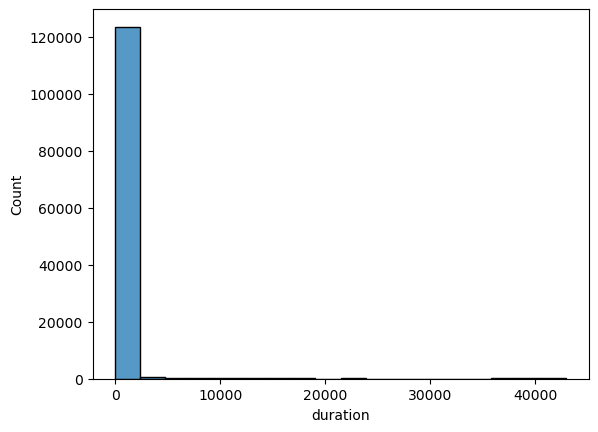

In [ ]:
sns.histplot(data['duration'])

<AxesSubplot:xlabel='urgent', ylabel='Count'>

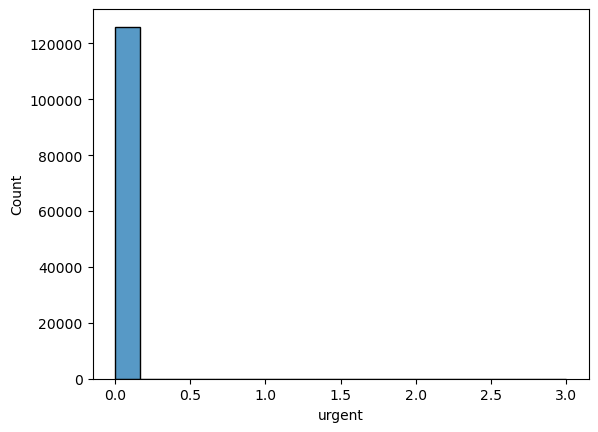

In [ ]:
sns.histplot(data['urgent'])

In [15]:
duplicate_rows_df = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df)

number of duplicate rows:          duration protocol_type service flag  src_bytes  dst_bytes  land  \
6087           0           tcp   imap4   SF          0          0     0   
12293          0           tcp   imap4   SF          0          0     0   
17675         41           tcp   imap4   SF       1334        162     0   
17875          0           tcp   imap4   S1       1492     649186     0   
21548          0           tcp   imap4   SH          0          0     0   
26928          0          icmp   eco_i   SF          8          0     0   
34013          0          icmp   eco_i   SF          8          0     0   
58310          0           tcp   imap4   SH          0          0     0   
64560          0           tcp   imap4   SH          0          0     0   
64813          0           tcp   imap4   SF          0          0     0   
79823          0          icmp   eco_i   SF          8          0     0   
79867          0          icmp   ecr_i   SF          8          0     0  

In [ ]:
data.count() 

duration                       125984
protocol_type                  125984
service                        125984
flag                           125984
src_bytes                      125984
dst_bytes                      125984
land                           125984
wrong_fragment                 125984
urgent                         125984
hot                            125984
num_failed_logins              125984
logged_in                      125984
num_compromised                125984
root_shell                     125984
su_attempted                   125984
num_root                       125984
num_file_creations             125984
num_shells                     125984
num_access_files               125984
num_outbound_cmds              125984
is_host_login                  125984
is_guest_login                 125984
count                          125984
srv_count                      125984
serror_rate                    125984
srv_serror_rate                125984
rerror_rate 

In [ ]:
data.shape

(125984, 43)

In [16]:
data = data.drop_duplicates()

In [19]:
data.shape

(125964, 43)

In [20]:
#standardize it

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance,attack_type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,normal


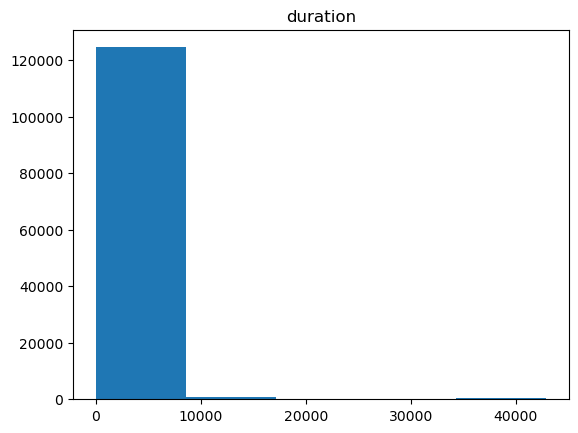

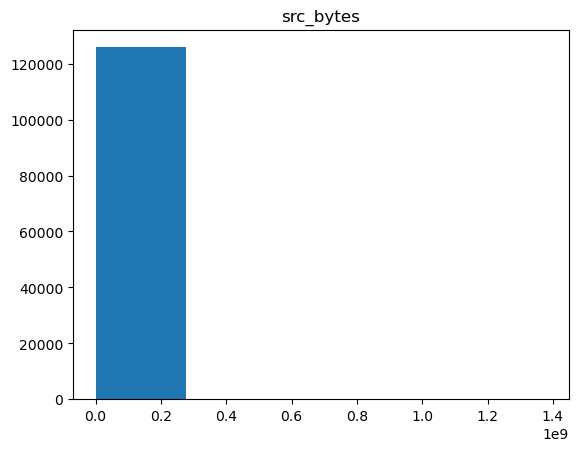

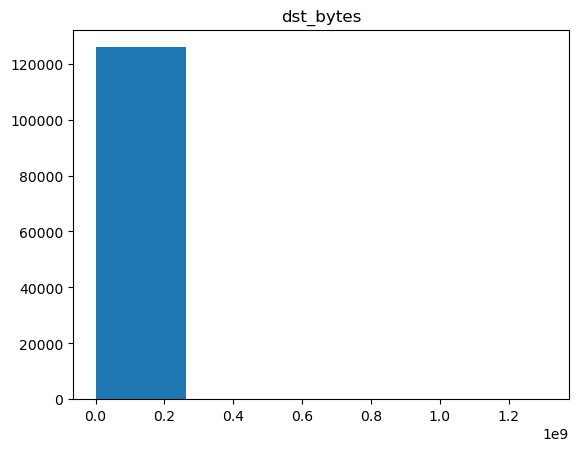

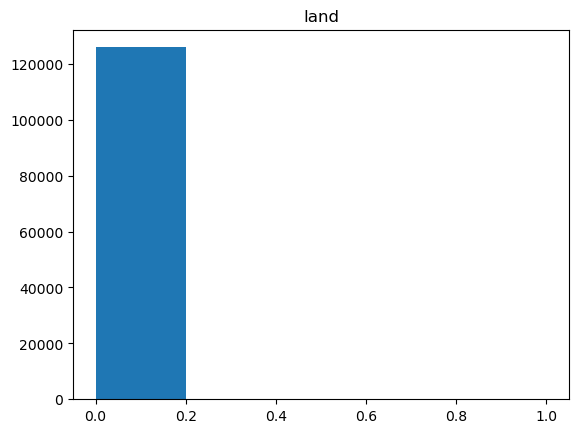

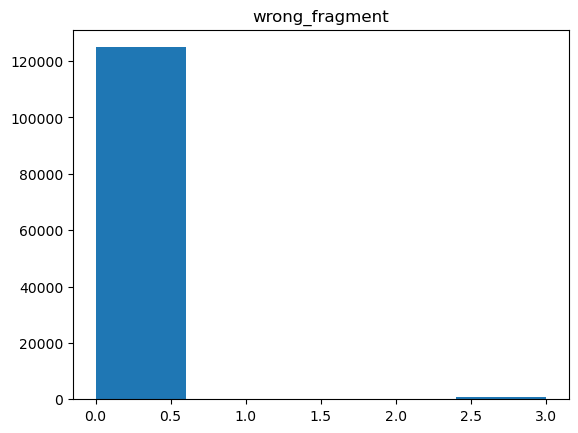

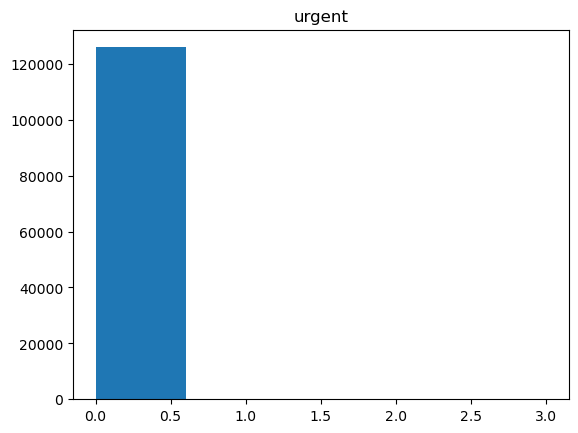

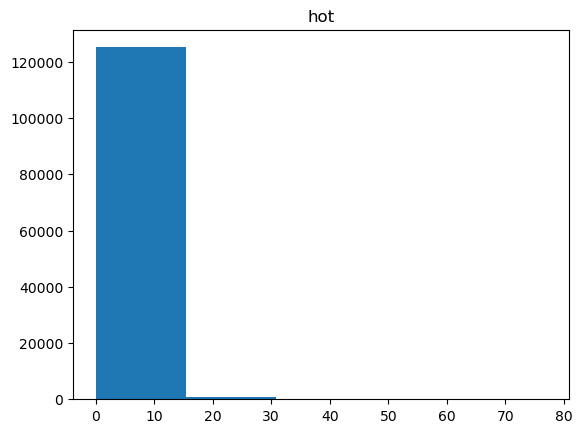

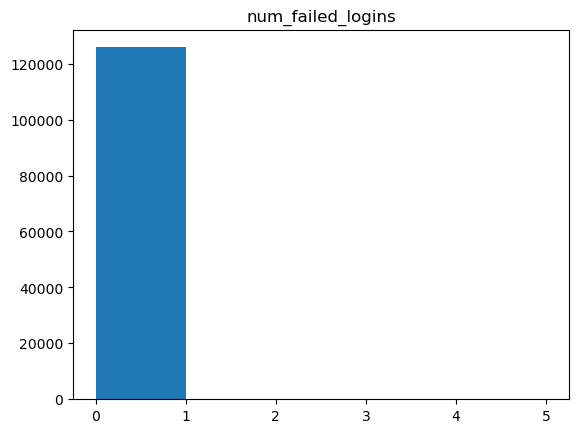

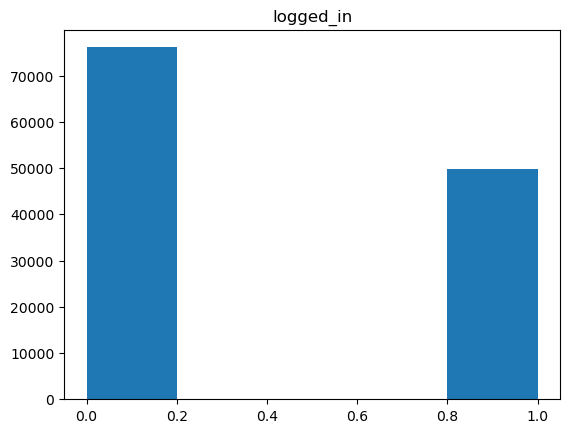

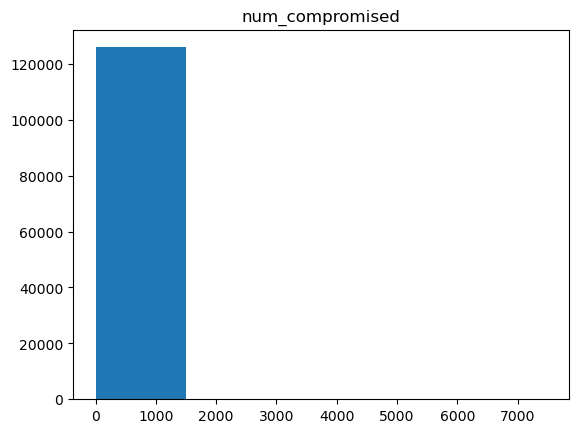

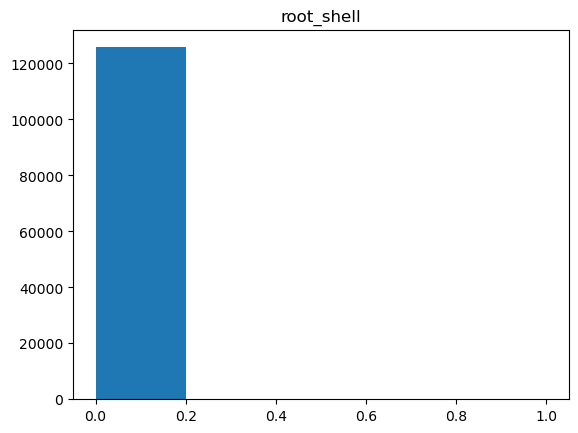

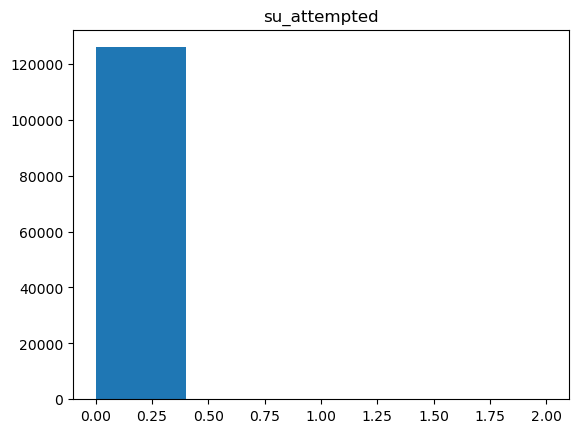

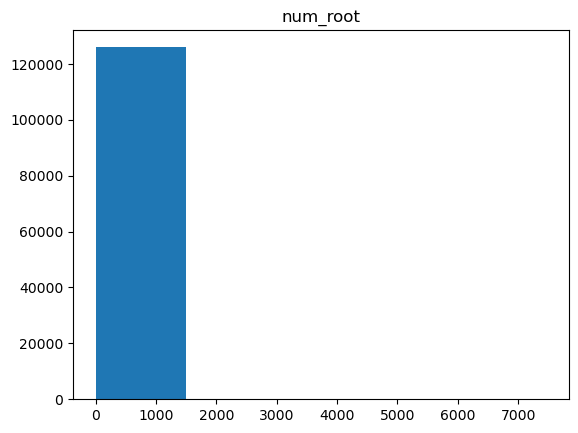

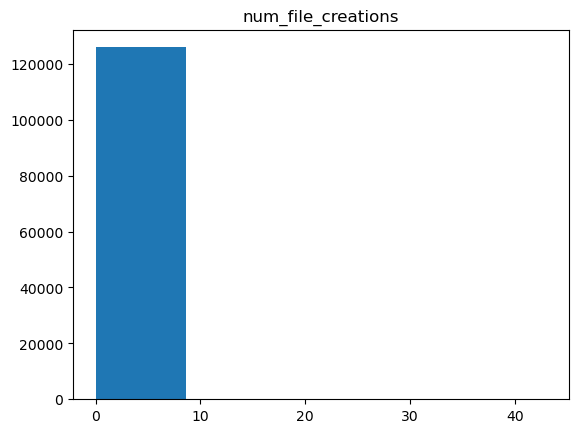

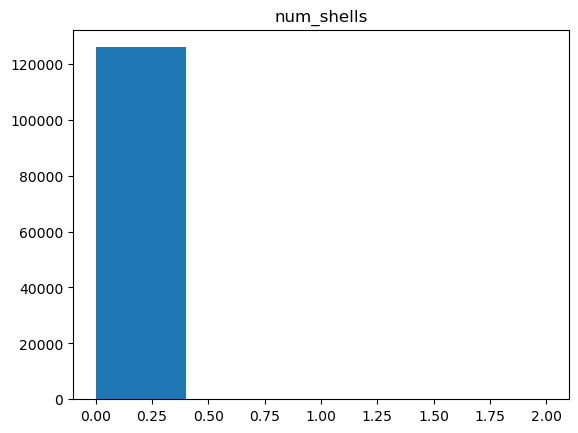

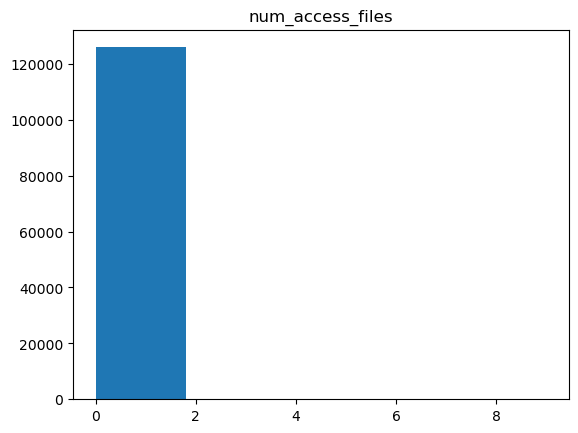

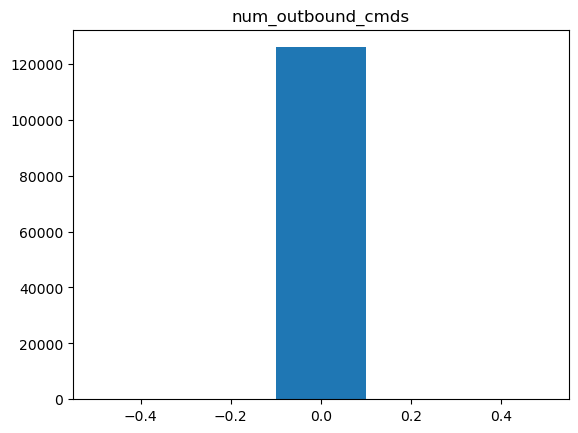

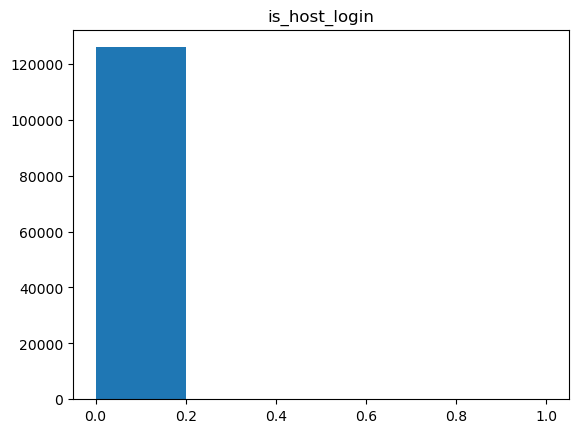

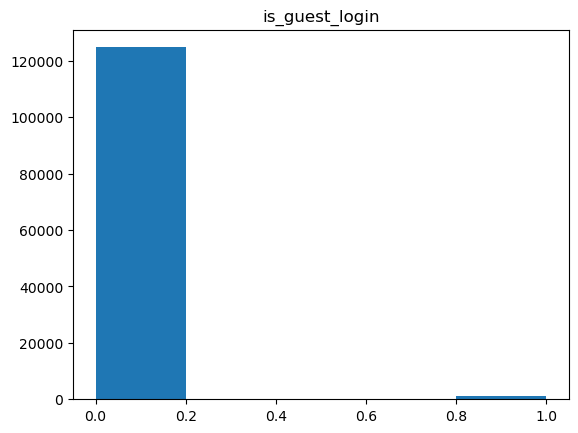

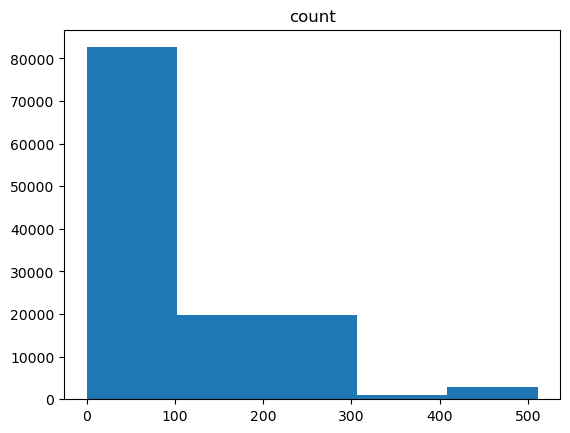

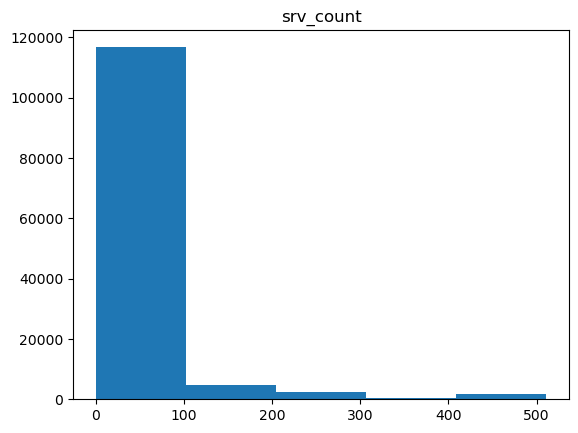

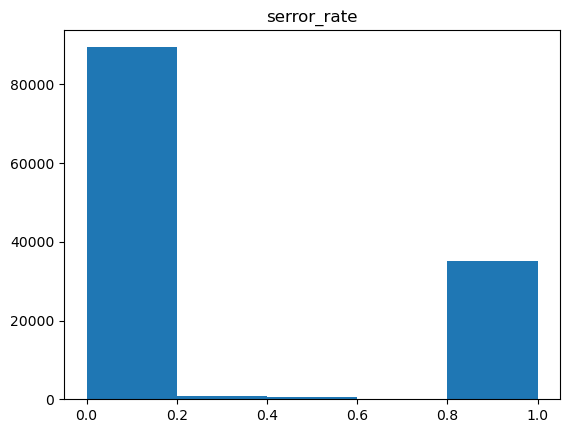

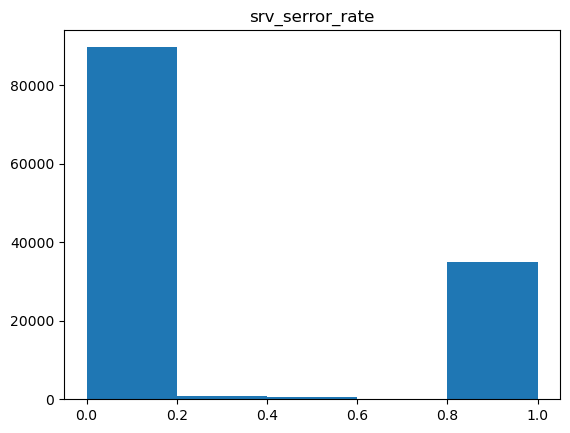

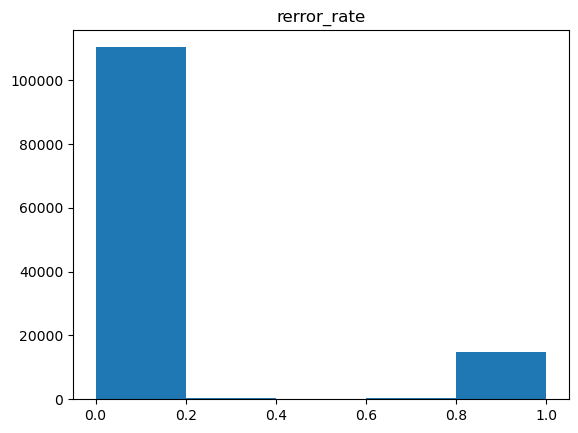

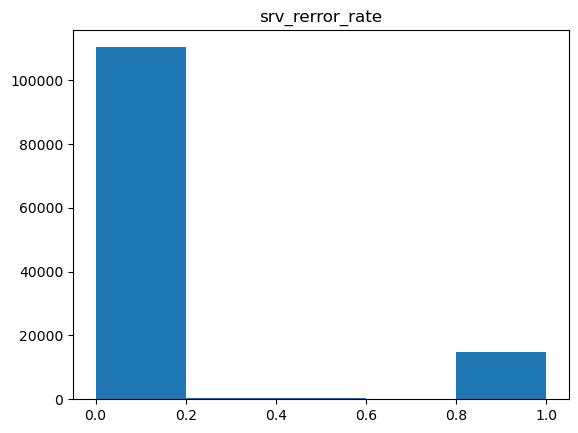

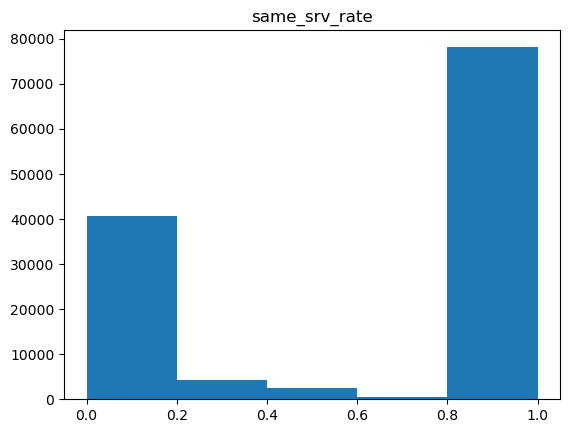

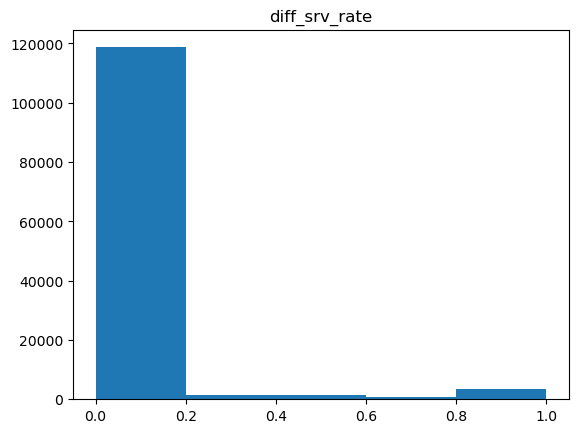

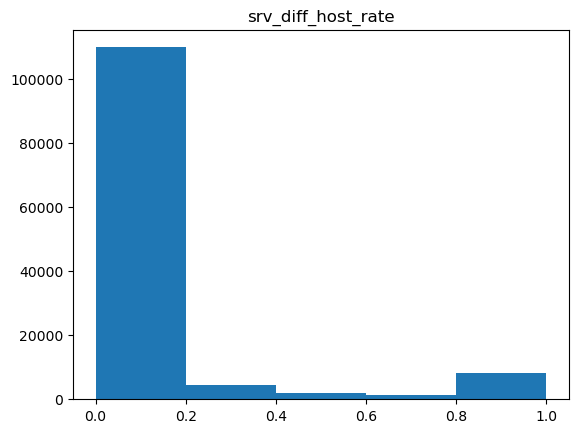

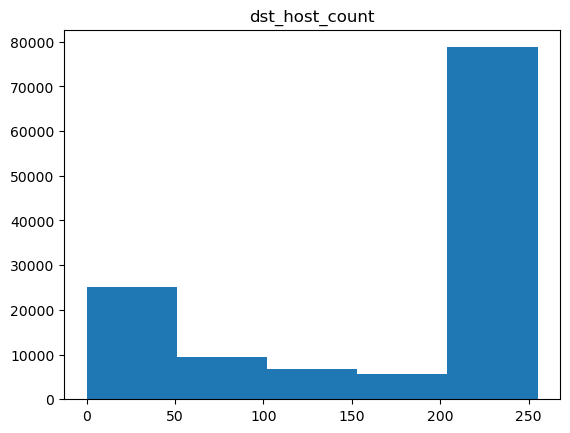

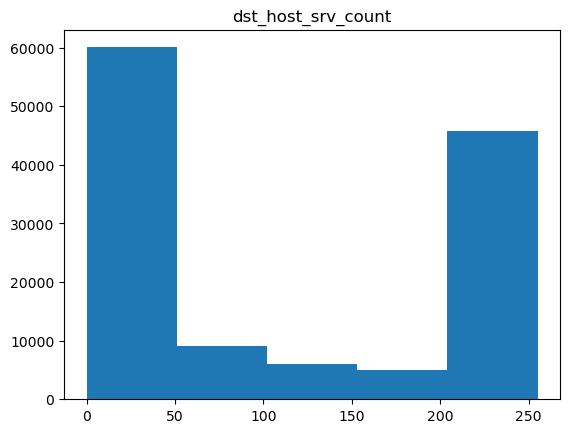

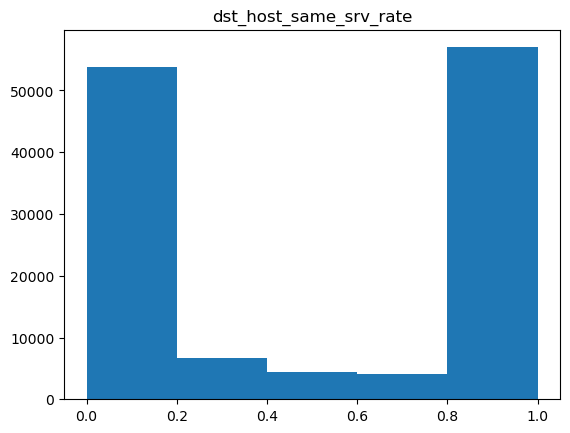

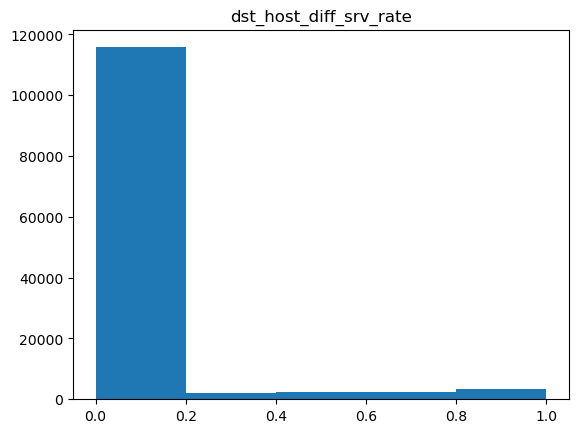

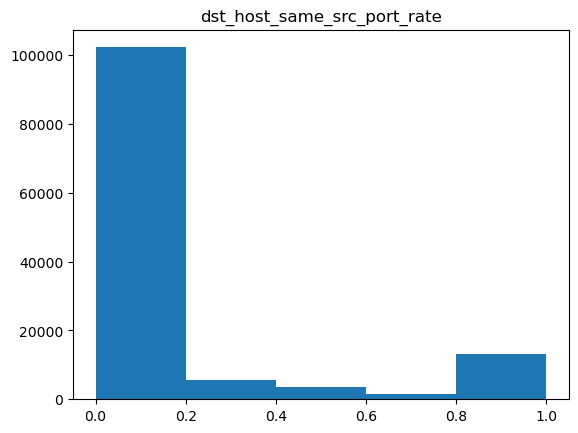

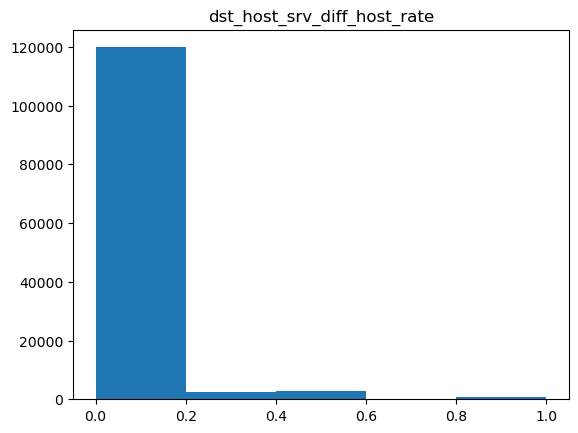

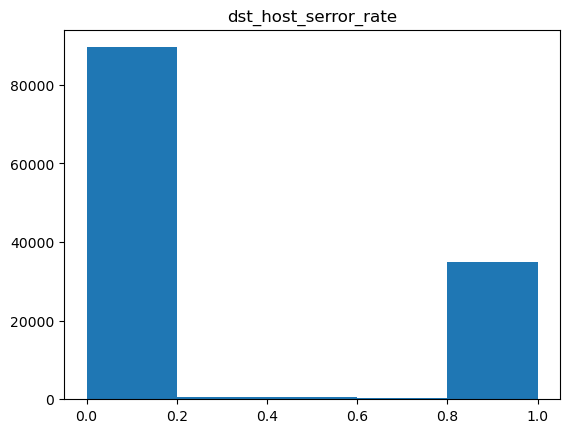

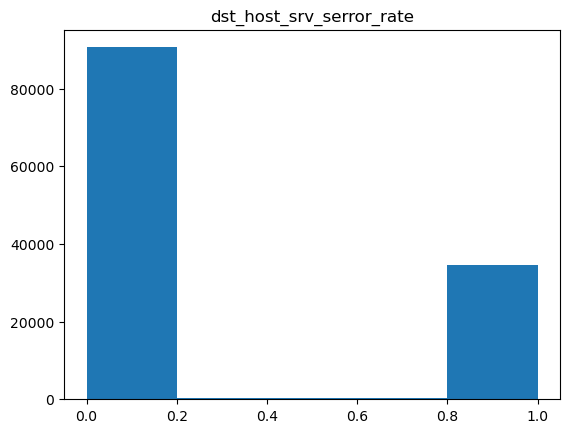

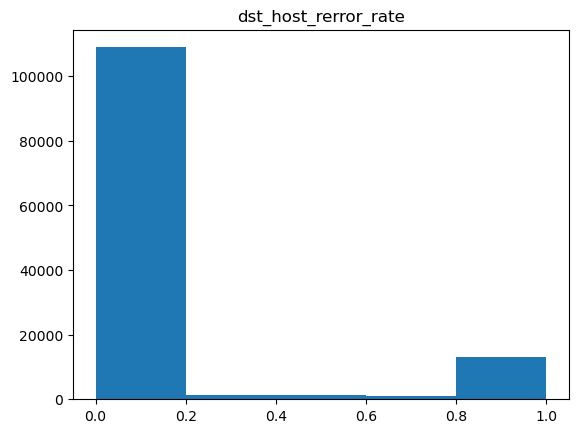

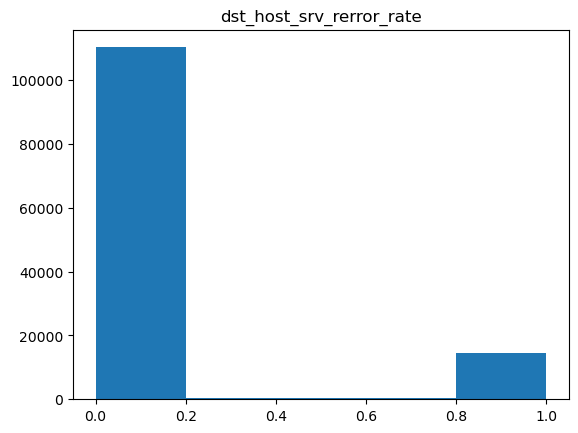

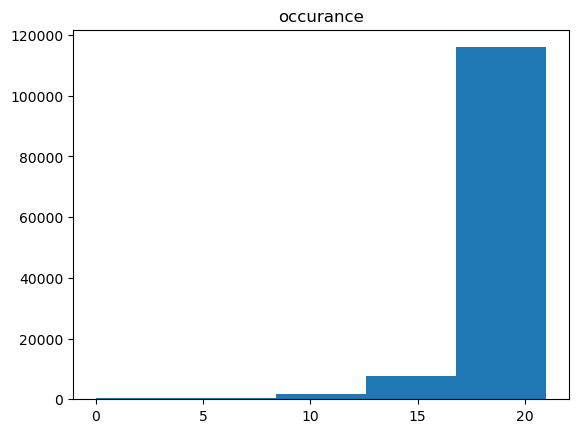

In [ ]:
for col in data.columns:
    if data[col].dtype != object:
        mp.hist(data[col], bins=5)
        mp.title(col)
        mp.show()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance,attack_type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125979,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,20,dos
125980,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,21,normal
125981,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,18,normal
125982,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,20,dos


In [17]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
categories = ['service','protocol_type','flag']
for category in categories:
# Using .fit_transform function to fit label
# encoder and return encoded label
    label = le.fit_transform(data[category])
    data.drop(category,axis=1)
    data[category] = label
 
 #printing label
    print(label)
data.head()

[20 44 49 ... 54 30 20]
[1 2 1 ... 1 1 1]
[9 9 5 ... 9 5 9]


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance,attack_type
0,0,1,20,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,normal
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,normal
2,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,dos
3,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,normal
4,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,normal


In [37]:
x = data.drop('attack_type',axis=1)
y = data['attack_type']

In [38]:
#standardize it now
from sklearn import preprocessing
standard = preprocessing.scale(x)
standardized_x = pd.DataFrame(standard, columns= x.columns)
print(standardized_x)

        duration  protocol_type   service      flag  src_bytes  dst_bytes  \
0      -0.110253      -0.124905 -0.686859  0.751153  -0.007679  -0.004919   
1      -0.110253       2.219539  0.781356  0.751153  -0.007738  -0.004919   
2      -0.110253      -0.124905  1.087234 -0.736170  -0.007763  -0.004919   
3      -0.110253      -0.124905 -0.442157  0.751153  -0.007723  -0.002891   
4      -0.110253      -0.124905 -0.442157  0.751153  -0.007729  -0.004814   
...          ...            ...       ...       ...        ...        ...   
125959 -0.110253      -0.124905  1.087234 -0.736170  -0.007763  -0.004919   
125960 -0.107182       2.219539  1.087234  0.751153  -0.007745  -0.004883   
125961 -0.110253      -0.124905  1.393112  0.751153  -0.007382  -0.004823   
125962 -0.110253      -0.124905 -0.075103 -0.736170  -0.007763  -0.004919   
125963 -0.110253      -0.124905 -0.686859  0.751153  -0.007737  -0.004919   

            land  wrong_fragment    urgent       hot  ...  dst_host_srv_cou

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(standardized_x,y,test_size=0.3,random_state =0)
X_train.shape, X_test.shape

((88174, 42), (37790, 42))

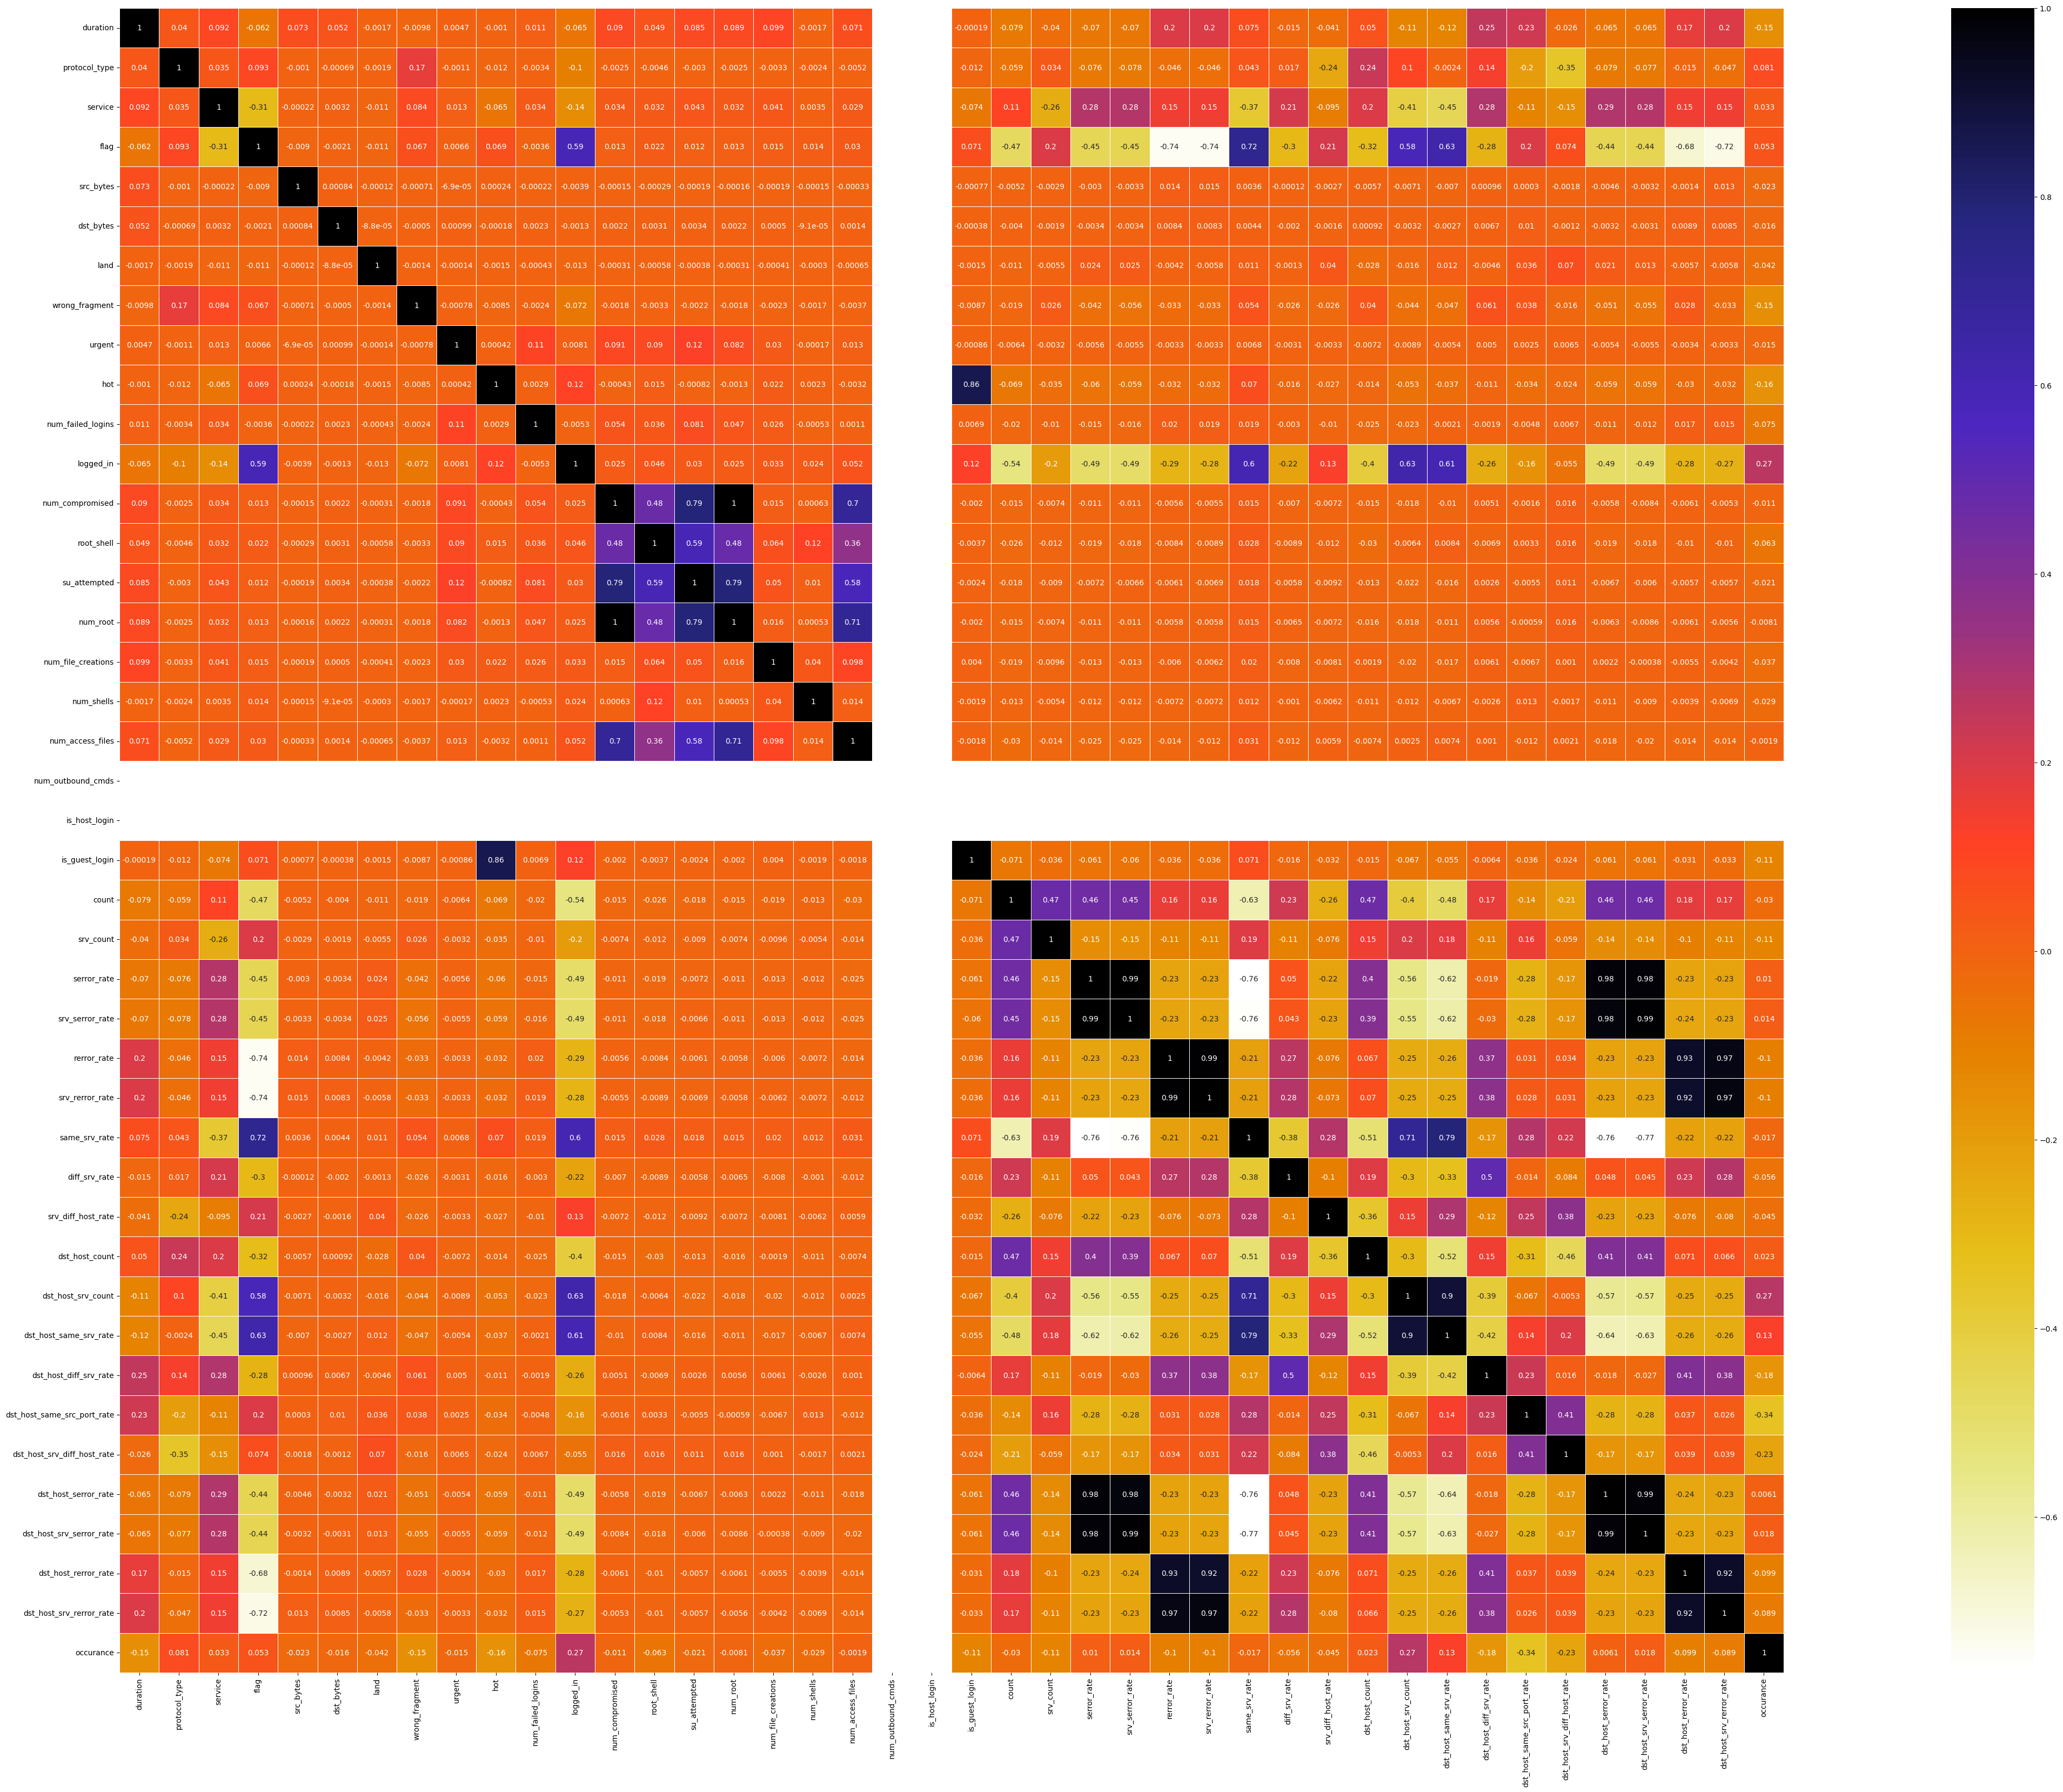

In [40]:
mp.figure(figsize=(80,40))
corr = X_train.corr()
sns.heatmap(corr, annot= True,cmap = mp.cm.CMRmap_r,square=True, linewidth =.5)
mp.show()

In [41]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

    

In [42]:
corr_features = correlation(X_train, 0.85)
len(set(corr_features))

9

In [43]:
corr_features

{'dst_host_rerror_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'is_guest_login',
 'num_root',
 'srv_rerror_rate',
 'srv_serror_rate'}

114921    0
110764    0
25770     0
44040     0
78543     0
         ..
45898     0
117969    0
42620     0
43574     0
68278     0
Name: num_outbound_cmds, Length: 88174, dtype: int64

In [44]:
Xtrnew = X_train.drop(corr_features,axis=1)
Xtestnew = X_test.drop(corr_features,axis=1)

In [45]:
Xtrnew.shape

(88174, 33)

In [29]:
Xtestnew.shape

(37790, 33)

Accuracy with k=3 99.37284996030697
Accuracy with k=5 99.24053982535062


# KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn3 = KNeighborsClassifier(n_neighbors=3)
knn5 = KNeighborsClassifier(n_neighbors=5)
knn3.fit(Xtrnew, y_train)
y_pred_3 = knn3.predict(Xtestnew)
knn5.fit(Xtrnew, y_train)
y_pred_5 = knn5.predict(Xtestnew)

print("Accuracy with k=3", accuracy_score(y_test, y_pred_3)*100)
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)


Accuracy with k=3 99.8227044191585
Accuracy with k=5 99.79624239216724


In [47]:
# now if we don't remove those features
knnact = KNeighborsClassifier(n_neighbors=3)
knnact.fit(X_train, y_train)
y_predict_act = knnact.predict(X_test)
print("Accuracy with k=3", accuracy_score(y_test, y_predict_act)*100)

Accuracy with k=3 99.86239745964541


# Decision Tree


In [48]:
from sklearn.tree import DecisionTreeClassifier
DTC_Model =DecisionTreeClassifier(criterion= 'entropy', max_depth=4, random_state=10)
DTC_Model.fit(Xtrnew, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=10)

In [49]:
DTC_Model.score(Xtrnew , y_train)

0.9689477623789325

In [50]:
DTC_Model =DecisionTreeClassifier(criterion= 'entropy', max_depth=4, random_state=10)
DTC_Model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=10)

In [51]:
DTC_Model.score(X_train , y_train)

0.9689477623789325

In [55]:
DTC_Model =DecisionTreeClassifier(criterion= 'gini', max_depth=4, random_state=10)
DTC_Model.fit(Xtrnew, y_train)

DecisionTreeClassifier(max_depth=4, random_state=10)

In [56]:
DTC_Model.score(Xtrnew , y_train)

0.9750153106357883